<a href="https://colab.research.google.com/github/shams8795/NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error, roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from xgboost import XGBClassifier
from matplotlib.patches import ConnectionPatch

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
df_train = pd.read_csv('/content/train - Copy.csv')
df_test = pd.read_csv('/content/test.csv')

df_train


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,14.0,0.0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,2.0,0.0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000.0,8.90,0.21,N,10.0,0.0
3,3,30,70000,RENT,14.0,VENTURE,B,12000.0,11.11,0.17,N,5.0,0.0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000.0,6.92,0.10,N,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51845,51845,23,66000,RENT,3.0,VENTURE,A,12000.0,6.91,0.18,N,3.0,0.0
51846,51846,22,45000,MORTGAGE,1.0,EDUCATION,D,7000.0,12.86,0.16,N,2.0,0.0
51847,51847,28,52000,MORTGAGE,12.0,HOMEIMPROVEMENT,A,3600.0,7.49,0.07,N,9.0,0.0
51848,51848,25,52000,RENT,1.0,EDUCATION,C,18000.0,13.11,0.35,Y,4.0,1.0


In [ ]:
df = df_train
df.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,14.0,0.0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,2.0,0.0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000.0,8.90,0.21,N,10.0,0.0
3,3,30,70000,RENT,14.0,VENTURE,B,12000.0,11.11,0.17,N,5.0,0.0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000.0,6.92,0.10,N,3.0,0.0


In [ ]:
df_train.columns


Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [ ]:
sdf_origi = df_train.copy()
print(sdf_origi.shape)


(51850, 13)


In [ ]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,51850.000000,51850.000000,5.185000e+04,51849.000000,51849.000000,51849.000000,51849.000000,51849.000000,51849.000000
mean,25924.500000,27.539595,6.410119e+04,4.702656,9219.133966,10.679989,0.159321,5.807287,0.143378
std,14967.950066,6.027474,3.829719e+04,3.963664,5561.243607,3.038389,0.091735,4.027842,0.350461
min,0.000000,20.000000,5.600000e+01,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,12962.250000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,25924.500000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,38886.750000,30.000000,7.578375e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,51849.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.060000,0.830000,30.000000,1.000000


In [ ]:
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23.0,69000.0,RENT,3.0,HOMEIMPROVEMENT,F,25000.0,15.76,0.36,N,2.0
1,58646,26.0,96000.0,MORTGAGE,6.0,PERSONAL,C,10000.0,12.68,0.10,Y,4.0
2,58647,26.0,30000.0,RENT,5.0,VENTURE,E,4000.0,17.19,0.13,Y,2.0
3,58648,33.0,50000.0,RENT,4.0,DEBTCONSOLIDATION,A,7000.0,8.90,0.14,N,7.0
4,58649,26.0,102000.0,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000.0,16.32,0.15,Y,4.0


In [ ]:
print("shams")

shams


In [ ]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [ ]:
#df_train.shape,df_test.shape

((51850, 12), (17818, 11))

In [ ]:
df_origi = df_train.copy()
df_train = pd.concat([df_train, df_origi], axis=0)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('/content/train - Copy.csv')


categorical_columns = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']

encoder = LabelEncoder()
for column in categorical_columns:
    train_data[column] = encoder.fit_transform(train_data[column])


print("Modified Train Data:")
print(train_data)



Modified Train Data:
          id  person_age  person_income  person_home_ownership  \
0          0          37          35000                      3   
1          1          22          56000                      2   
2          2          29          28800                      2   
3          3          30          70000                      3   
4          4          22          60000                      3   
...      ...         ...            ...                    ...   
58640  58640          34         120000                      0   
58641  58641          28          28800                      3   
58642  58642          23          44000                      3   
58643  58643          22          30000                      3   
58644  58644          31          75000                      0   

       person_emp_length  loan_intent loan_grade  loan_amnt  loan_int_rate  \
0                    0.0            1          B       6000          11.49   
1                    6.0      

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
train_df = pd.read_csv('/content/train - Copy.csv')


scaler = MinMaxScaler()

numerical_columns = list(set(train_df.select_dtypes(include=['float64', 'int64']).columns))


if 'loan_status' in numerical_columns:
    numerical_columns.remove('loan_status')


train_df[numerical_columns] = train_df[numerical_columns].fillna(train_df[numerical_columns].mean())

train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])

print("Normalized Train Data:")
print(train_df)




Normalized Train Data:
             id  person_age  person_income person_home_ownership  \
0      0.000000    0.165049       0.016246                  RENT   
1      0.000017    0.019417       0.027324                   OWN   
2      0.000034    0.087379       0.012976                   OWN   
3      0.000051    0.097087       0.034708                  RENT   
4      0.000068    0.019417       0.029433                  RENT   
...         ...         ...            ...                   ...   
58640  0.999932    0.135922       0.061082              MORTGAGE   
58641  0.999949    0.077670       0.012976                  RENT   
58642  0.999966    0.029126       0.020994                  RENT   
58643  0.999983    0.019417       0.013609                  RENT   
58644  1.000000    0.106796       0.037346              MORTGAGE   

       person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0               0.000000   EDUCATION          B   0.159420       0.341011   
1     

In [ ]:

train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()
# كود تاني ل  encoding

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,0.000000,0.165049,0.016246,1.000000,0.000000,0.2,0.159420,0.341011,0.204819,0.0,0.428571,0,True,False,False,False,False,False
1,0.000017,0.019417,0.027324,0.666667,0.048780,0.6,0.101449,0.445506,0.084337,0.0,0.000000,0,False,True,False,False,False,False
2,0.000034,0.087379,0.012976,0.666667,0.065041,0.8,0.159420,0.195506,0.253012,0.0,0.285714,0,False,False,False,False,False,False
3,0.000051,0.097087,0.034708,1.000000,0.113821,1.0,0.333333,0.319663,0.204819,0.0,0.107143,0,True,False,False,False,False,False
4,0.000068,0.019417,0.029433,1.000000,0.016260,0.6,0.159420,0.084270,0.120482,0.0,0.035714,0,False,False,False,False,False,False


In [ ]:
print("shams")

shams


In [ ]:
print("neural network")

neural network


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

encoder = LabelEncoder()

categorical_columns = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade']

for col in categorical_columns:
    train_df[col] = encoder.fit_transform(train_df[col])

train_df = train_df.dropna()
X = train_df.drop('loan_status', axis=1)
y = train_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_2_layers = Sequential()
model_2_layers.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  #
model_2_layers.add(Dense(32, activation='relu'))
model_2_layers.add(Dense(1, activation='sigmoid'))
model_2_layers.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model_2_layers.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
y_pred = (model_2_layers.predict(X_test) > 0.5).astype("int32")

print(f"Accuracy with 2 hidden layers: {accuracy_score(y_test, y_pred)}")
#layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8774 - loss: 0.3416 - val_accuracy: 0.9095 - val_loss: 0.2666
Epoch 2/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9089 - loss: 0.2488 - val_accuracy: 0.9120 - val_loss: 0.2491
Epoch 3/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9207 - loss: 0.2347 - val_accuracy: 0.9194 - val_loss: 0.2378
Epoch 4/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9211 - loss: 0.2294 - val_accuracy: 0.9227 - val_loss: 0.2306
Epoch 5/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9246 - loss: 0.2219 - val_accuracy: 0.9230 - val_loss: 0.2289
Epoch 6/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9234 - loss: 0.2234 - val_accuracy: 0.9268 - val_loss: 0.2269
Epoch 7/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9238 - loss: 0.2180 - val_accuracy: 0.9273 - val_loss: 0.2221
Epoch 8/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9289 - loss: 0.2116 - 

In [ ]:

model_3_layers = Sequential()
model_3_layers.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # طبقة مخفية
model_3_layers.add(Dense(64, activation='relu'))  # طبقة مخفية أخرى
model_3_layers.add(Dense(32, activation='relu'))  # طبقة مخفية ثالثة
model_3_layers.add(Dense(1, activation='sigmoid'))  # طبقة الإخراج
model_3_layers.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model_3_layers.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
y_pred = (model_3_layers.predict(X_test) > 0.5).astype("int32")
print(f"Accuracy with 3 hidden layers: {accuracy_score(y_test, y_pred)}")
#layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8672 - loss: 0.3450 - val_accuracy: 0.9150 - val_loss: 0.2438
Epoch 2/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9157 - loss: 0.2379 - val_accuracy: 0.9189 - val_loss: 0.2305
Epoch 3/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9186 - loss: 0.2243 - val_accuracy: 0.9270 - val_loss: 0.2217
Epoch 4/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9254 - loss: 0.2179 - val_accuracy: 0.9221 - val_loss: 0.2230
Epoch 5/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9271 - loss: 0.2119 - val_accuracy: 0.9240 - val_loss: 0.2180
Epoch 6/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9281 - loss: 0.2101 - val_accuracy: 0.9327 - val_loss: 0.2149
Epoch 7/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9325 - loss: 0.2035 - val_accuracy: 0.9321 - val_loss: 0.2104
Epoch 8/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9304 - loss: 0.2078 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(784,),
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.0001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.0001)))  # Very small stddev

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')
#initail weight

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4241 - loss: 1.7482 - val_accuracy: 0.3836 - val_loss: 1.6775
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.3636 - loss: 1.7861 - val_accuracy: 0.4206 - val_loss: 1.6141
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3841 - loss: 1.7446 - val_accuracy: 0.4096 - val_loss: 1.6838
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3620 - loss: 1.8081 - val_accuracy: 0.4259 - val_loss: 1.6215
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3633 - loss: 1.7667 - val_accuracy: 0.4655 - val_loss: 2.0511
313/313 - 0s - 1ms/step - accuracy: 0.4655 - loss: 2.0511
Test accuracy: 0.46549999713897705


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05)))
model.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05)))
model.add(Dense(1, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05)))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy}')
#inital weight

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8824 - loss: 0.3292 - val_accuracy: 0.9158 - val_loss: 0.2300
Epoch 2/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9155 - loss: 0.2375 - val_accuracy: 0.9210 - val_loss: 0.2201
Epoch 3/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9195 - loss: 0.2261 - val_accuracy: 0.9286 - val_loss: 0.2102
Epoch 4/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9255 - loss: 0.2165 - val_accuracy: 0.9294 - val_loss: 0.2067
Epoch 5/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9285 - loss: 0.2080 - val_accuracy: 0.9320 - val_loss: 0.2042
Epoch 6/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9291 - loss: 0.2052 - val_accuracy: 0.9350 - val_loss: 0.2011
Epoch 7/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9338 - loss: 0.1974 - val_accuracy: 0.9338 - val_loss: 0.2000
Epoch 8/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9322 - loss: 0.2031 -

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255

model_0_01 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

optimizer_0_01 = Adam(learning_rate=0.01)
model_0_01.compile(optimizer=optimizer_0_01, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_0_01 = model_0_01.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

print("Test Accuracy (0.01):", model_0_01.evaluate(X_test, y_test))
#learing rate

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8878 - loss: 0.3674 - val_accuracy: 0.9441 - val_loss: 0.2098
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9490 - loss: 0.1789 - val_accuracy: 0.9503 - val_loss: 0.1897
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9598 - loss: 0.1481 - val_accuracy: 0.9630 - val_loss: 0.1363
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9651 - loss: 0.1273 - val_accuracy: 0.9631 - val_loss: 0.1511
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9682 - loss: 0.1201 - val_accuracy: 0.9552 - val_loss: 0.1933
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.2135
Test Accuracy (0.01): [0.19331340491771698, 0.9552000164985657]


In [ ]:
# إنشاء النموذج
model_0_001 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


optimizer_0_001 = Adam(learning_rate=0.001)
model_0_001.compile(optimizer=optimizer_0_001, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history_0_001 = model_0_001.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

print("Test Accuracy (0.001):", model_0_001.evaluate(X_test, y_test))
#lerring rate

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8771 - loss: 0.4080 - val_accuracy: 0.9614 - val_loss: 0.1205
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9684 - loss: 0.0996 - val_accuracy: 0.9747 - val_loss: 0.0816
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9790 - loss: 0.0666 - val_accuracy: 0.9751 - val_loss: 0.0829
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9846 - loss: 0.0506 - val_accuracy: 0.9764 - val_loss: 0.0788
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9875 - loss: 0.0382 - val_accuracy: 0.9712 - val_loss: 0.0973
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9676 - loss: 0.1111
Test Accuracy (0.001): [0.09728966653347015, 0.9711999893188477]


In [ ]:
# إنشاء النموذج
model_0_0001 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


optimizer_0_0001 = Adam(learning_rate=0.0001)
model_0_0001.compile(optimizer=optimizer_0_0001, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_0_0001 = model_0_0001.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

print("Test Accuracy (0.0001):", model_0_0001.evaluate(X_test, y_test))
#learing rate

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6997 - loss: 1.0666 - val_accuracy: 0.9247 - val_loss: 0.2726
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9234 - loss: 0.2715 - val_accuracy: 0.9382 - val_loss: 0.2127
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9431 - loss: 0.2054 - val_accuracy: 0.9491 - val_loss: 0.1780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9521 - loss: 0.1716 - val_accuracy: 0.9562 - val_loss: 0.1551
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9596 - loss: 0.1414 - val_accuracy: 0.9607 - val_loss: 0.1374
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9555 - loss: 0.1581
Test Accuracy (0.0001): [0.13735271990299225, 0.9606999754905701]


In [ ]:
from keras import regularizers


model_l2 = Sequential([
    Dense(128, input_shape=(784,), activation='relu',
          kernel_regularizer=regularizers.l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='softmax')
])

model_l2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_l2 = model_l2.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

print("Test Accuracy with L2 Regularization:", model_l2.evaluate(X_test, y_test))
# rec

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8577 - loss: 1.2781 - val_accuracy: 0.9316 - val_loss: 0.5035
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9232 - loss: 0.5066 - val_accuracy: 0.9390 - val_loss: 0.4426
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9365 - loss: 0.4381 - val_accuracy: 0.9357 - val_loss: 0.4070
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9397 - loss: 0.4010 - val_accuracy: 0.9442 - val_loss: 0.3659
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9435 - loss: 0.3719 - val_accuracy: 0.9494 - val_loss: 0.3538
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9383 - loss: 0.3855
Test Accuracy with L2 Regularization: [0.35381361842155457, 0.949400007724762]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2


model_dropout_l2 = Sequential()
model_dropout_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_dim=784))
model_dropout_l2.add(Dropout(0.2))
model_dropout_l2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_dropout_l2.add(Dropout(0.2))
model_dropout_l2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model_dropout_l2.add(Dropout(0.2))
model_dropout_l2.add(Dense(10, activation='softmax'))

model_dropout_l2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_dropout_l2 = model_dropout_l2.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


test_accuracy_dropout_l2 = model_dropout_l2.evaluate(X_test, y_test)
print("Test Accuracy with Dropout and L2 Regularization:", test_accuracy_dropout_l2)
#reg

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7303 - loss: 1.7891 - val_accuracy: 0.9123 - val_loss: 0.6734
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8831 - loss: 0.7794 - val_accuracy: 0.9222 - val_loss: 0.6132
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8953 - loss: 0.7039 - val_accuracy: 0.9285 - val_loss: 0.5570
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9025 - loss: 0.6600 - val_accuracy: 0.9299 - val_loss: 0.5465
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9035 - loss: 0.6451 - val_accuracy: 0.9427 - val_loss: 0.5005
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9331 - loss: 0.5281
Test Accuracy with Dropout and L2 Regularization: [0.5005024671554565, 0.9427000284194946]


In [ ]:
from keras.layers import Dropout
from keras.optimizers import Adamax

model_optimized = Sequential()
model_optimized.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01), input_dim=784))
model_optimized.add(Dropout(0.3))  t
model_optimized.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model_optimized.add(Dropout(0.3))
model_optimized.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model_optimized.add(Dropout(0.3))
model_optimized.add(Dense(10, activation='softmax'))


model_optimized.compile(optimizer=Adamax(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_optimized = model_optimized.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

print("Test Accuracy with Optimized Model:", model_optimized.evaluate(X_test, y_test))
#rego

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.7760 - loss: 3.8675 - val_accuracy: 0.9171 - val_loss: 0.7441
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9044 - loss: 0.7513 - val_accuracy: 0.9360 - val_loss: 0.5922
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9214 - loss: 0.6352 - val_accuracy: 0.9409 - val_loss: 0.5328
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9238 - loss: 0.5881 - val_accuracy: 0.9390 - val_loss: 0.5238
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9300 - loss: 0.5573 - val_accuracy: 0.9490 - val_loss: 0.4722
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9318 - loss: 0.5305 - val_accuracy: 0.9511 - val_loss: 0.4546
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9333 - loss: 0.5100 - val_accuracy: 0.9526 - val_loss: 0.4372
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9364 -

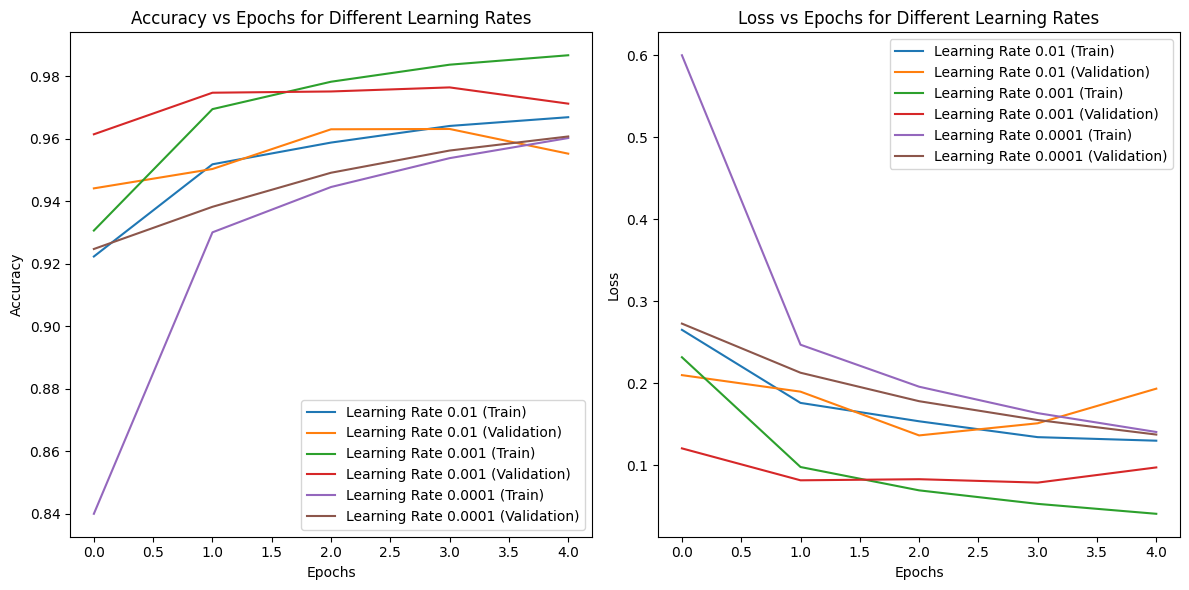

In [ ]:
import matplotlib.pyplot as plt


def plot_learning_rate_comparison(history_0_01, history_0_001, history_0_0001):
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(history_0_01.history['accuracy'], label='Learning Rate 0.01 (Train)')
    plt.plot(history_0_01.history['val_accuracy'], label='Learning Rate 0.01 (Validation)')
    plt.plot(history_0_001.history['accuracy'], label='Learning Rate 0.001 (Train)')
    plt.plot(history_0_001.history['val_accuracy'], label='Learning Rate 0.001 (Validation)')
    plt.plot(history_0_0001.history['accuracy'], label='Learning Rate 0.0001 (Train)')
    plt.plot(history_0_0001.history['val_accuracy'], label='Learning Rate 0.0001 (Validation)')
    plt.title('Accuracy vs Epochs for Different Learning Rates')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(history_0_01.history['loss'], label='Learning Rate 0.01 (Train)')
    plt.plot(history_0_01.history['val_loss'], label='Learning Rate 0.01 (Validation)')
    plt.plot(history_0_001.history['loss'], label='Learning Rate 0.001 (Train)')
    plt.plot(history_0_001.history['val_loss'], label='Learning Rate 0.001 (Validation)')
    plt.plot(history_0_0001.history['loss'], label='Learning Rate 0.0001 (Train)')
    plt.plot(history_0_0001.history['val_loss'], label='Learning Rate 0.0001 (Validation)')
    plt.title('Loss vs Epochs for Different Learning Rates')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_rate_comparison(history_0_01, history_0_001, history_0_0001)
#رسمه learing rate

In [ ]:

!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


model = Sequential()
model.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test, y_test))


y_pred_prob = model.predict(X_test)

threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

for i, prediction in enumerate(y_pred):
    print(f"Sample {i + 1}: Predicted: {prediction[0]} Actual: {y_test.iloc[i]}")


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Streaming output truncated to the last 5000 lines.
Sample 6744: Predicted: 0 Actual: 0
Sample 6745: Predicted: 0 Actual: 0
Sample 6746: Predicted: 1 Actual: 0
Sample 6747: Predicted: 0 Actual: 0
Sample 6748: Predicted: 0 Actual: 0
Sample 6749: Predicted: 0 Actual: 0
Sample 6750: Predicted: 0 Actual: 0
Sample 6751: Predicted: 0 Actual: 0
Sample 6752: Predicted: 0 Actual: 0
Sample 6753: Predicted: 1 Actual: 1
Sample 6754: Predicted: 0 Actual: 0
Sample 6755: Predicted: 0 Actual: 0
Sample 6756: Predicted: 1 Actual: 0
Sample 6757: Predicted: 0 Actual: 0
Sample 6758: Predicted: 0 Actual: 0
Sample 6759: Predicted: 0 Actual: 1
Sample 6760: Predicted: 0 Actual: 0
Sample 6761: Predicted: 0 Actual: 0
Sample 6762: Predicted: 0 Actual: 0
Sample 6763: Predicted: 0 Actual: 0
Sample 6764: Predicted: 0 Actual: 0
Sample 6765: Predicted: 0 Actual: 0
Sample 6766: Predicted: 0 Actual: 0
Sample 6767: Predicted: 1 Actual: 1
Sample 6768: Predicted: 0 Actual: 0
Sample 6769: Predicted: 1 Actual: 1
Sample 6770: 